<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train Test Split</a></span><ul class="toc-item"><li><span><a href="#Stratifying" data-toc-modified-id="Stratifying-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Stratifying</a></span></li></ul></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Random Forest Classifier</a></span><ul class="toc-item"><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Feature Importance</a></span></li></ul></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Decision Tree</a></span></li></ul></li><li><span><a href="#Old-data-set" data-toc-modified-id="Old-data-set-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Old data set</a></span><ul class="toc-item"><li><span><a href="#data-cleaning" data-toc-modified-id="data-cleaning-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>data cleaning</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random forest</a></span><ul class="toc-item"><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
dataCleanMalicious = pd.read_csv("output_derbin.csv")
dataCleanTest = pd.read_csv("output_test.csv")
dataCleanTrain = pd.read_csv("output_train.csv")

# Data Cleaning

In [3]:
# add labels
dataCleanMalicious = dataCleanMalicious.fillna(0.0)
dataCleanMalicious['malicious'] = 1

dataCleanTest = dataCleanTest.fillna(0.0)
dataCleanTest['malicious'] = 0

dataCleanTrain = dataCleanTrain.fillna(0.0)
dataCleanTrain['malicious'] = 0

In [4]:
dataCleanMalicious.shape

(5436, 287)

In [5]:
dataCleanTest.shape

(17338, 2525)

In [6]:
dataCleanTrain.shape

(17275, 2678)

In [7]:
# combining csv
data = pd.concat([dataCleanMalicious, dataCleanTest, dataCleanTrain], ignore_index=True, sort=False)
data = data.fillna(0.0)

In [8]:
data.head()

,_error,_file,p_Android.permission.CHANGE_CONFIGURATION,p_android.Manifest.permission.WRITE_SECURE_SETTINGS,p_android.hardware.camera.autofocus,p_android.permission.ACCESS_ASSISTED_GPS,p_android.permission.ACCESS_CACHE_FILESYSTEM,p_android.permission.ACCESS_CELL_ID,p_android.permission.ACCESS_CHECKIN_PROPERTIES,p_android.permission.ACCESS_COARSE_LOCATION,...,p_in.wptrafficanalyzer.locationingooglemapv2.permission.MAPS_RECEIVE,p_kr.co.jtr.jtrapp.permission.C2D_MESSAGE,p_mobileOps_Android.MobileOps_Android.permission.MAPS_RECEIVE,p_net.dinglisch.android.tasker.PERMISSION_RUN_TASKS,p_net.proyectosbeta.mapas_ejemplo_google_maps_apiv2_1.permission.MAPS_RECEIVE,p_net.tawacentral.roger.secrets.permission.SECRETS,p_oncanoe.permission.MAPS_RECEIVE,p_org.dayup.gtask.permission.READ_TASKS,p_org.thialfihar.android.apg.permission.READ_KEY_DETAILS,p_your.application.package.permission.MAPS_RECEIVE
0,0.0,app4886.apk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,app220.apk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,app3437.apk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,app1556.apk,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,app4213.apk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data.shape

(40049, 4928)

# Train Test Split
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

Train Dataset: Used to fit the machine learning model.\
Test Dataset: Used to evaluate the fit machine learning model.

The objective is to estimate the performance of the machine learning model on new data, data not used to train the model.

## Stratifying
a Stratified Train-Test Splits split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [11]:
y = data['malicious'] # Labels

In [12]:
X = data.drop(['malicious'], axis=1) # Features
apps_name = data['_file']
X = X.drop(['_file'], axis=1)

In [13]:
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) # 80% training and 20% test

print('Without stratify Y total:      ', Counter(y))
print('Without stratify y_train:', Counter(y_train))
print('Without stratify y_test: ', Counter(y_test), '\n')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) # 80% training and 20% test
X_train.shape, X_test.shape
print('With stratify Y total:      ', Counter(y))
print('With stratify y_train:', Counter(y_train))
print('With stratify y_test: ', Counter(y_test), '\n')

Without stratify Y total:       Counter({0: 34613, 1: 5436})
Without stratify y_train: Counter({0: 27684, 1: 4355})
Without stratify y_test:  Counter({0: 6929, 1: 1081}) 

With stratify Y total:       Counter({0: 34613, 1: 5436})
With stratify y_train: Counter({0: 27690, 1: 4349})
With stratify y_test:  Counter({0: 6923, 1: 1087}) 



in order to keep the ratio of malicious to benign in the training set and the testing set we use Stratifying
( 0.75% benign , 0.15% malicious)

In [14]:
print(f"Training set:\nn_samples: {X_train.shape[0]} \nn_features: {X_train.shape[1]}\n")
print(f"Testing set:\nn_samples: {X_test.shape[0]} \nn_features: {X_test.shape[1]}")

Training set:
n_samples: 32039 
n_features: 4926

Testing set:
n_samples: 8010 
n_features: 4926


# Random Forest Classifier
Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems.\
It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

In [15]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Creating a Gaussian Classifier 
# n_estimators- number of trees to be used in the forest.
clf=RandomForestClassifier(n_estimators=100)

#Training the model using the training sets
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

## Evaluation

In [16]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
print(cm)
print(metrics.classification_report(y_test, y_pred, labels=[0, 1]))
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f2 = metrics.fbeta_score(y_test, y_pred, beta=2.0)
print('precision_score=%.3f, recall_score=%.3f, F2-measure=%.3f' % (p, r, f2))

Accuracy: 0.9856429463171036
[[6881   42]
 [  73 1014]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6923
           1       0.96      0.93      0.95      1087

    accuracy                           0.99      8010
   macro avg       0.97      0.96      0.97      8010
weighted avg       0.99      0.99      0.99      8010

precision_score=0.960, recall_score=0.933, F2-measure=0.938


[Text(0.5, 23.52222222222222, 'Predicted labels'),
 Text(50.722222222222214, 0.5, 'True labels')]

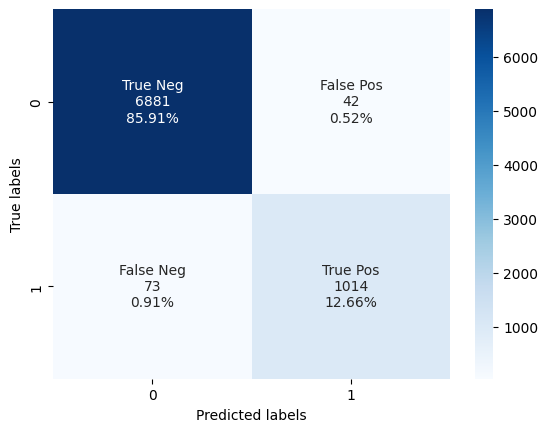

In [17]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
s = sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')
s.set(xlabel='Predicted labels', ylabel='True labels')


### Feature Importance
By looking at the model feature importance we are able to see which features contributed the most to the model analysis  

In [18]:
feature_importance = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_importance

p_android.permission.SEND_SMS                                    0.133856
p_android.permission.READ_PHONE_STATE                            0.081766
p_android.permission.READ_SMS                                    0.059629
p_android.permission.RECEIVE_SMS                                 0.047092
p_android.permission.RECEIVE_BOOT_COMPLETED                      0.040201
                                                                   ...   
p_com.rovertrail.rovertrail.permission.C2D_MESSAGE               0.000000
p_com.sabqqgoodapps.permission.C2D_MESSAGE                       0.000000
p_com.atomicleads.fastloanfindercanada.permission.C2D_MESSAGE    0.000000
p_com.safeon.approval.permission.C2D_MESSAGE                     0.000000
p_kr.i77_cu_189.permission.C2D_MESSAGE                           0.000000
Length: 4926, dtype: float64

## Decision Tree
The decision tree algorithm is a supervised learning algorithm for classification or regression problems. Our end goal is to use historical data to predict an outcome.

A decision tree is a tree like structure whereby an internal node represents an attribute, a branch represents a decision rule, and the leaf nodes represent an outcome.

This works by splitting the data into separate partitions according to an attribute selection measure, which in this case is the Gini index (although we can change this to information gain if we wanted).
This essentially means that each split aims to reduce Gini impurity which measures how impure a node is according to incorrectly classified results.

Gini Index:
calculates the probability of a certain randomly selected feature that was classified incorrectly.

The Gini Index varies between 0 and 1, where 0 represents purity of the classification
and 1 denotes random distribution of elements among various classes.
A Gini Index of 0.5 shows that there is equal distribution of elements across some classes.
The goal of the split is to increase the node purity.

Accuracy: 0.9436953807740325
Cell description:
 # the rule to split by: left-true, right-false 
 # gini impurity 
 # number of samples in the node 
 # calss proportions 
 # majority class

Color coding:
 dark is more pure, ultimately what the tree is trying to achieve 

Right: has the permission
Left: doesn't have the permission


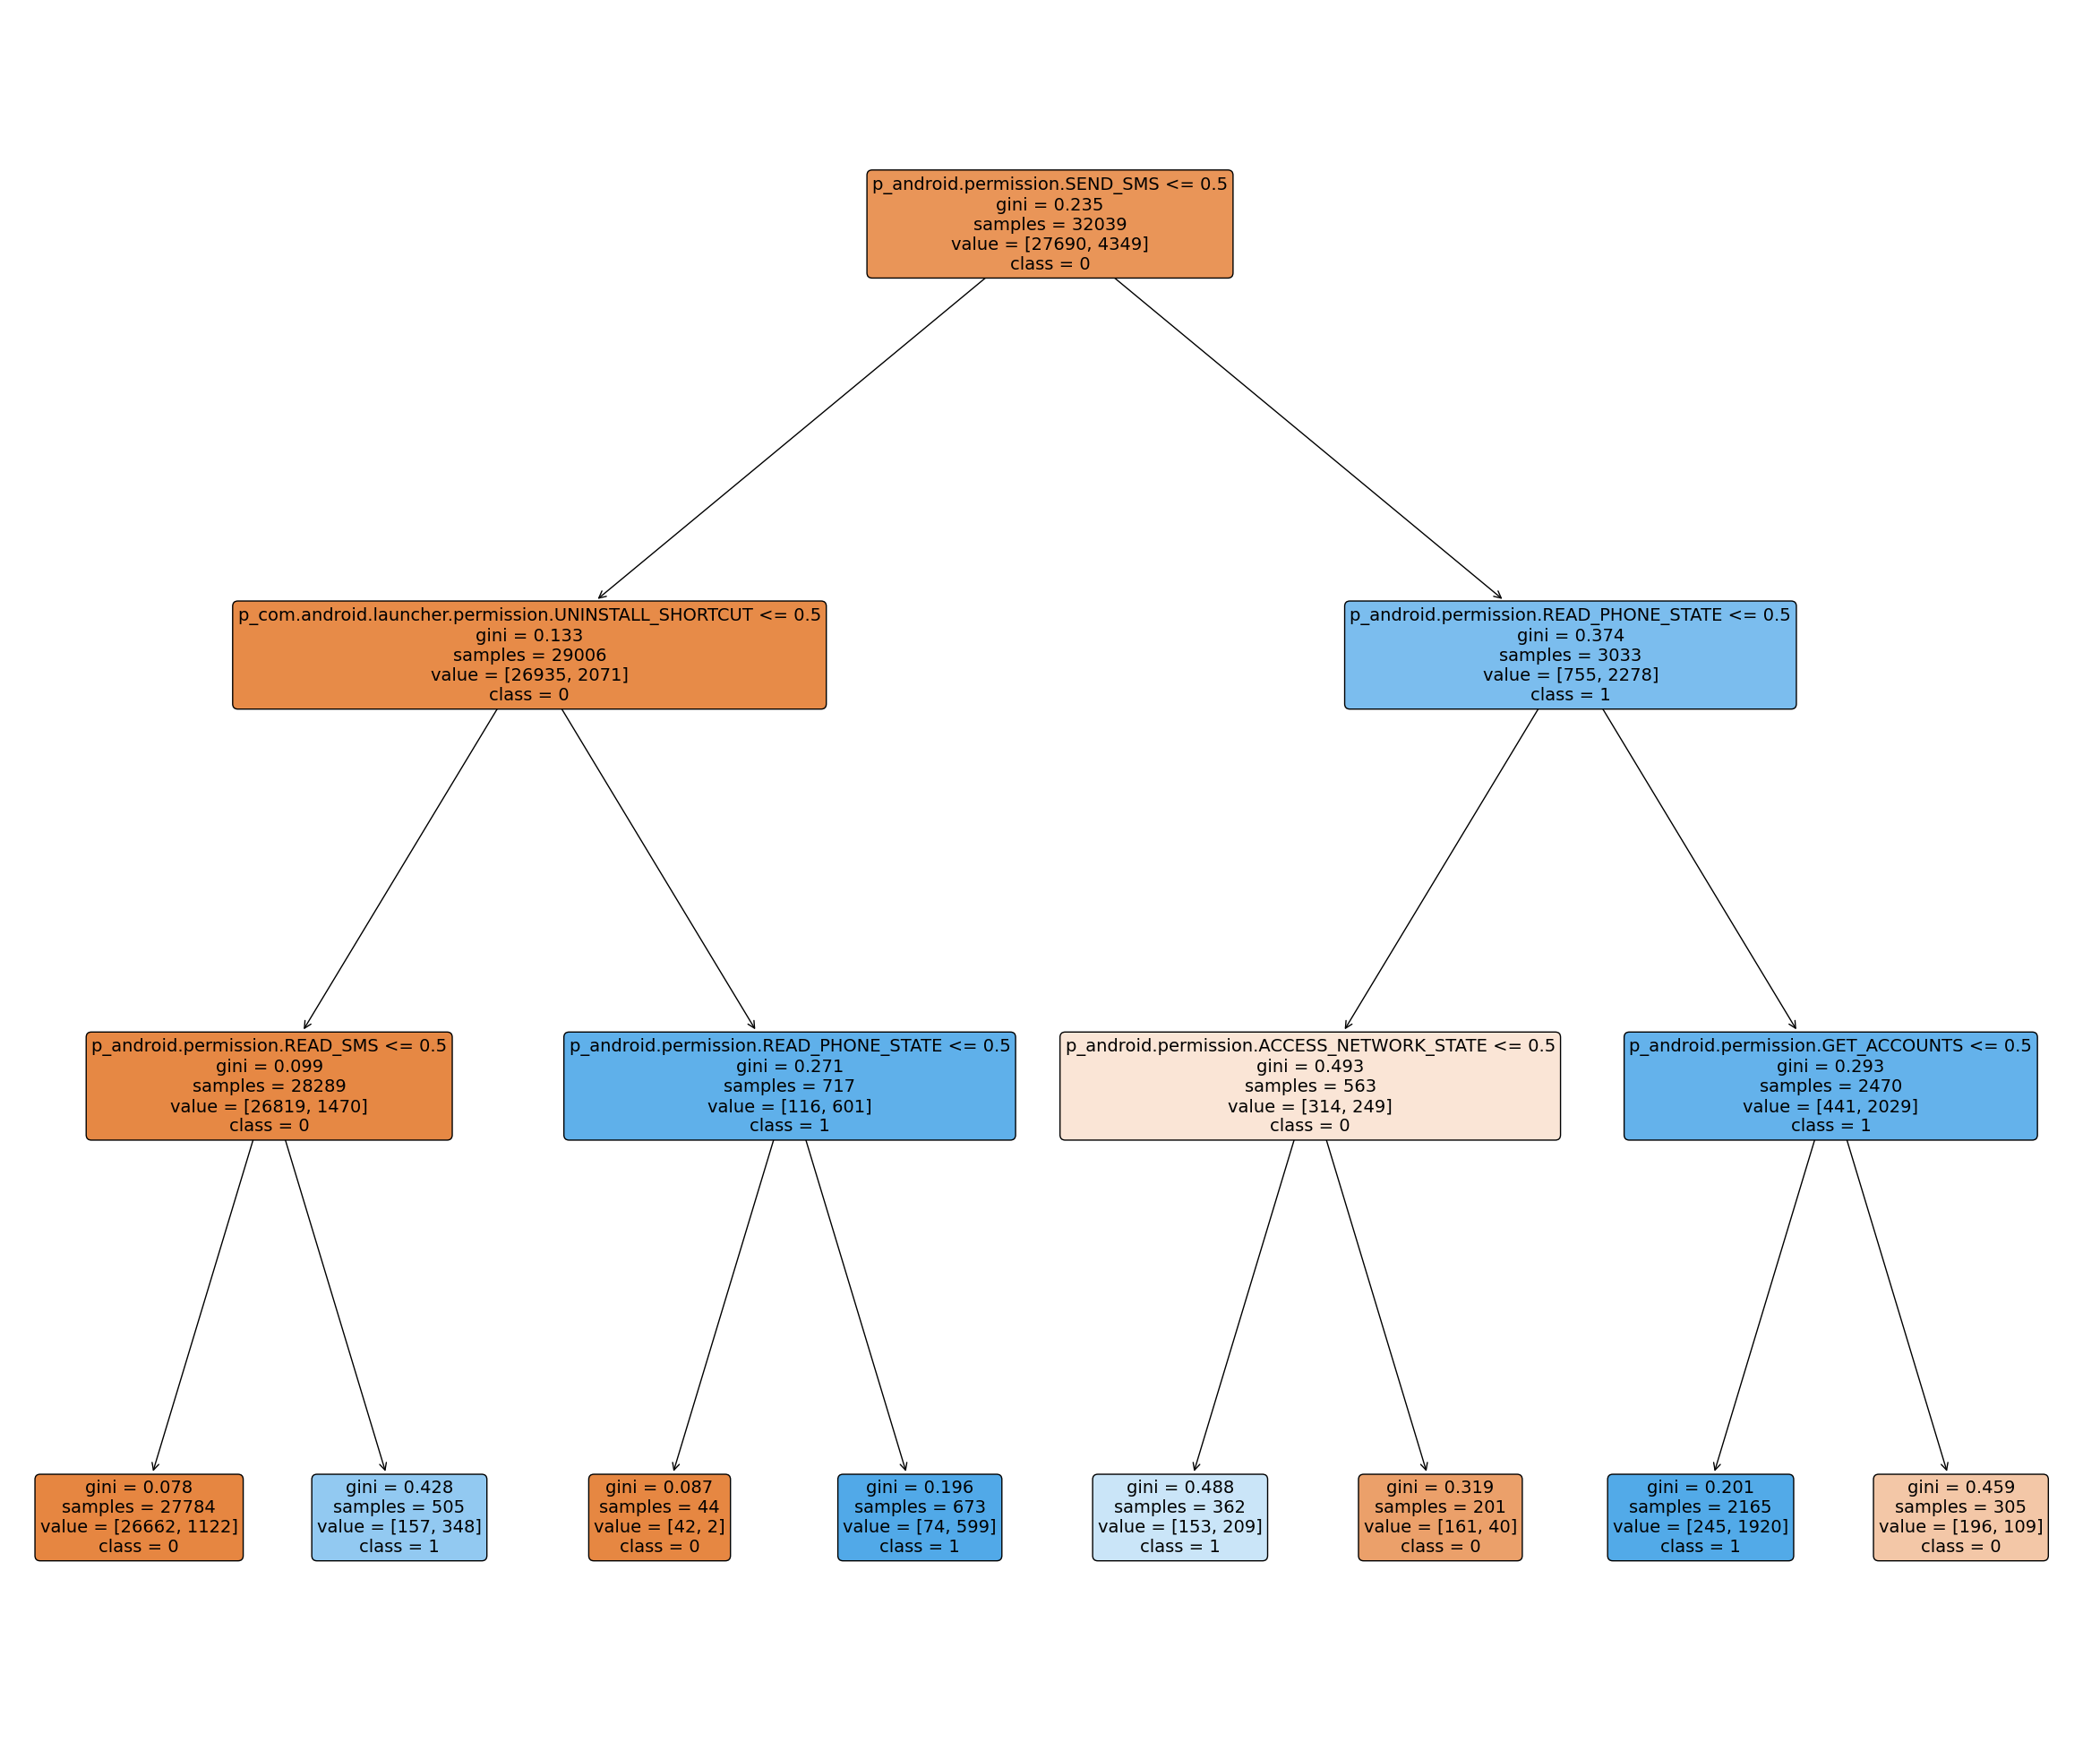

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)
clf.fit(X_train, y_train)
plt.figure(figsize=(30,25))
tree.plot_tree(clf,
               feature_names = X.columns, 
               class_names=['0','1'],
               filled = True,
               fontsize=14,
               rounded=True);
# proportion=True

y_pred  = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Cell description:\n # the rule to split by: left-true, right-false \n # gini impurity \n # number of samples in the node \n # calss proportions \n # majority class\n")
print("Color coding:\n dark is more pure, ultimately what the tree is trying to achieve \n")
print("Right: has the permission")
print("Left: doesn't have the permission")

# Old data set

In [20]:
oldData = pd.read_csv("data.csv")

In [21]:
oldData.head()

,name,type,group_num,group_mani,category,perm_rate,call__,perm: ENABLE_NOTIFICATION,perm: READ_SYNC_SETTINGS,perm: MY_DELETE_MESSAGES,...,perm: READ_CLIPS,perm: LICENSE,perm: ACCESS_GGOGLE_SEARCH_API,perm: READ_PRELOAD_DEVICE_INFO_PROVIDER,perm: LOGIN,perm: WRITEFEEDS,perm: MODE_WORLD_WRITEABLE,perm: WRITE_EXTERNALS_STORAGE,perm: CHANGE_WIFI_STATE,perm: PREVENT_POWER_KEY
0,a.a.hikidashi.apk,0,5,0,0,0.000004,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a.akakao.ogspring.apk,0,5,0,0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,a.azzedine.jamal.apk,0,5,0,0,0.000003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,a.envisionmobile.caa.apk,0,5,0,0,0.000001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,a.fellex.rezeptrechner.apk,0,5,0,0,0.000006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## data cleaning

In [22]:
y = oldData['type'] # Labels
X = oldData.drop(['type'], axis=1) # Features
old_apps_name = oldData['name']
X.drop(['name'], axis=1, inplace=True)
X.drop(['group_num'], axis=1, inplace=True)
X.drop(['group_mani'], axis=1, inplace=True)
X.drop(['category'], axis=1, inplace=True)
X.drop(['perm_rate'], axis=1, inplace=True)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) # 80% training and 20% test
X_train.shape, X_test.shape
print('With stratify Y total:      ', Counter(y))
print('With stratify y_train:', Counter(y_train))
print('With stratify y_test: ', Counter(y_test), '\n')

With stratify Y total:       Counter({1: 65885, 0: 59397})
With stratify y_train: Counter({1: 52708, 0: 47517})
With stratify y_test:  Counter({1: 13177, 0: 11880}) 



## Random forest

In [24]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Creating a Gaussian Classifier 
# n_estimators- number of trees to be used in the forest.
clf=RandomForestClassifier(n_estimators=100)

#Training the model using the training sets
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

### Evaluation

In [25]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
print(cm)
print(metrics.classification_report(y_test, y_pred, labels=[0, 1]))
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
f2 = metrics.fbeta_score(y_test, y_pred, beta=2.0)
print('precision_score=%.3f, recall_score=%.3f, F2-measure=%.3f' % (p, r, f2))

Accuracy: 0.8813106118050844
[[11511   369]
 [ 2605 10572]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     11880
           1       0.97      0.80      0.88     13177

    accuracy                           0.88     25057
   macro avg       0.89      0.89      0.88     25057
weighted avg       0.89      0.88      0.88     25057

precision_score=0.966, recall_score=0.802, F2-measure=0.830


In [26]:
feature_importance = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_importance

perm: READ_PHONE_STATE          0.077737
perm: PHONE                     0.056197
perm: GET_TASKS                 0.047954
perm: ACCESS_FINE_LOCATION      0.045267
perm: WRITE_EXTERNAL_STORAGE    0.042417
                                  ...   
perm: READ_GSETTINGS            0.000000
perm: ReadSharedData2           0.000000
perm: ACTION_DIAL               0.000000
perm: ENTERPRISE_CONTAINER      0.000000
perm: SENDTO                    0.000000
Length: 1028, dtype: float64

[Text(0.5, 23.52222222222222, 'Predicted labels'),
 Text(50.722222222222214, 0.5, 'True labels')]

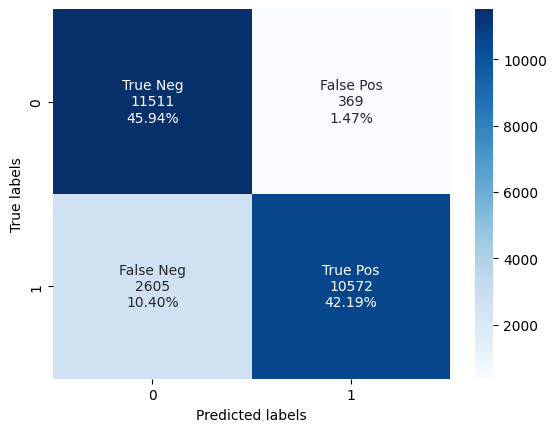

In [27]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
s = sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')
s.set(xlabel='Predicted labels', ylabel='True labels')
